# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [85]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [87]:
df = pd.read_csv("911.csv")

** Check the info() of the df **

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [89]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [90]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [91]:
df.zip.value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [92]:
df.twp.value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [93]:
df.title.nunique()

110

In [94]:
len(df.title.unique())

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [95]:
x = df.title.iloc[0]
x

'EMS: BACK PAINS/INJURY'

In [96]:
x.split(':')

['EMS', ' BACK PAINS/INJURY']

In [97]:
x.split(':')[0]

'EMS'

In [98]:
df.title.iloc[0]

'EMS: BACK PAINS/INJURY'

In [99]:
df.Reason = df.title.apply(lambda a: a.split(':')[0]) ### applies split at ':' to each item in df.title

In [120]:
df['Reason'] = df.title.apply(lambda x: x.split(':')[0]) ### will split scalar x len(df.title) times!! repeating \
                                                      ### same value len(df.title) times !!!!!!!!!!!!!
df.Reason
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Day of Week', 'Month', 'Reason'],
      dtype='object')

** What is the most common Reason for a 911 call based off of this new column? **

In [105]:
df.Reason.value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: title, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

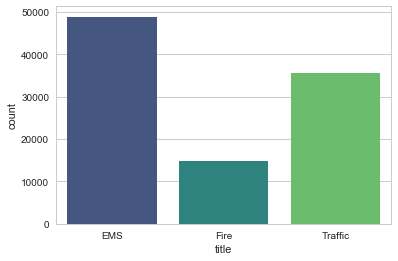

In [106]:
sns.countplot(df.Reason, palette = 'viridis')

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [108]:
df.timeStamp.iloc[0]

'2015-12-10 17:40:00'

In [109]:
type(df.timeStamp.iloc[0])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [110]:
df.timeStamp = pd.to_datetime(df.timeStamp)

In [111]:
type(df.timeStamp.iloc[0])

pandas._libs.tslib.Timestamp

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [122]:
df['Hour'] = df.timeStamp.apply(lambda z: z.hour)
df['Month'] = df.timeStamp.apply(lambda k: k.month)
df['Day of Week'] = df.timeStamp.apply(lambda v: v.dayofweek)
df['Day of Week']

0        3
1        3
2        3
3        3
4        3
5        3
6        3
7        3
8        3
9        3
10       3
11       3
12       3
13       3
14       3
15       3
16       3
17       3
18       3
19       3
20       3
21       3
22       3
23       3
24       3
25       3
26       3
27       3
28       3
29       3
        ..
99462    2
99463    2
99464    2
99465    2
99466    2
99467    2
99468    2
99469    2
99470    2
99471    2
99472    2
99473    2
99474    2
99475    2
99476    2
99477    2
99478    2
99479    2
99480    2
99481    2
99482    2
99483    2
99484    2
99485    2
99486    2
99487    2
99488    2
99489    2
99490    2
99491    2
Name: Day of Week, Length: 99492, dtype: int64

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [123]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [124]:
df['Day of Week'] = df['Day of Week'].map(dmap)
# type(df['Day of Week'].iloc[0])
df['Day of Week'].value_counts()

Tue    15150
Wed    14879
Fri    14833
Mon    14680
Thu    14478
Sat    13336
Sun    12136
Name: Day of Week, dtype: int64

In [125]:
df.replace({'Day of Week':dmap})
df['Day of Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
5        Thu
6        Thu
7        Thu
8        Thu
9        Thu
10       Thu
11       Thu
12       Thu
13       Thu
14       Thu
15       Thu
16       Thu
17       Thu
18       Thu
19       Thu
20       Thu
21       Thu
22       Thu
23       Thu
24       Thu
25       Thu
26       Thu
27       Thu
28       Thu
29       Thu
        ... 
99462    Wed
99463    Wed
99464    Wed
99465    Wed
99466    Wed
99467    Wed
99468    Wed
99469    Wed
99470    Wed
99471    Wed
99472    Wed
99473    Wed
99474    Wed
99475    Wed
99476    Wed
99477    Wed
99478    Wed
99479    Wed
99480    Wed
99481    Wed
99482    Wed
99483    Wed
99484    Wed
99485    Wed
99486    Wed
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Day of Week', 'Month', 'Reason', 'Hour'],
      dtype='object')

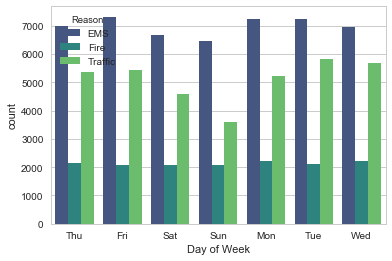

In [126]:
sns.countplot(x='Day of Week',data=df, hue='Reason',palette='viridis')
df.columns

**Now do the same for Month:**

In [127]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Day of Week', 'Month', 'Reason', 'Hour'],
      dtype='object')

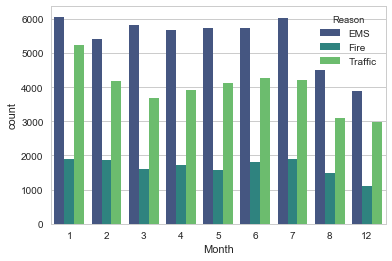

In [128]:
df['Month']= df.timeStamp.apply(lambda k: k.month)
sns.countplot(x = 'Month', data = df, hue = 'Reason', palette = 'viridis')

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [156]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Day of Week,Reason,Hour
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


In [137]:
byMonth1 = df.groupby('Month').count()
byMonth1.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Day of Week,Reason,Hour
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

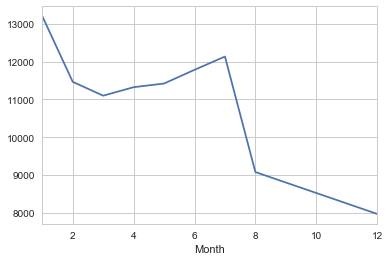

In [143]:
byMonth.Reason.plot()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [157]:
byMonth.index.rename('Month', inplace=True)
byMonth.head()
byMonth.reset_index(inplace=True)


In [158]:
byMonth.head()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Day of Week,Reason,Hour
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


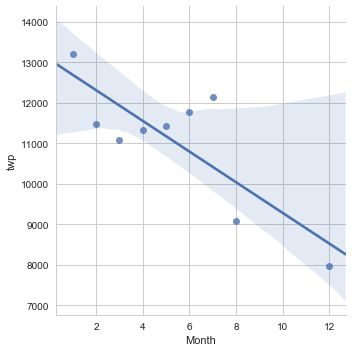

In [159]:
sns.lmplot('Month', 'twp', byMonth)

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [165]:
df.timeStamp[0].date()
df.Date = df.timeStamp.apply(lambda x: x.date())
df.columns 

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Day of Week', 'Month', 'Reason', 'Hour'],
      dtype='object')

# Note how df.col doesn't add a new col to the dataframe. USE df['Col']

In [167]:
df['Date'] = df.timeStamp.apply(lambda x: x.date())
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Day of Week', 'Month', 'Reason', 'Hour', 'Date'],
      dtype='object')

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

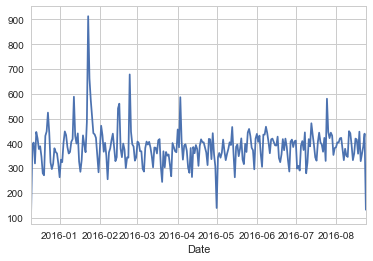

In [168]:
df.groupby('Date')['twp'].count().plot()

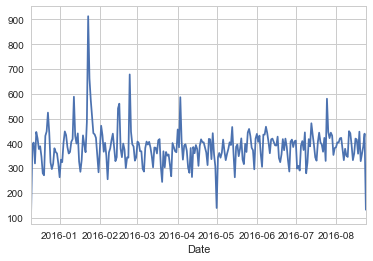

In [169]:
df.groupby('Date').count()['twp'].plot()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

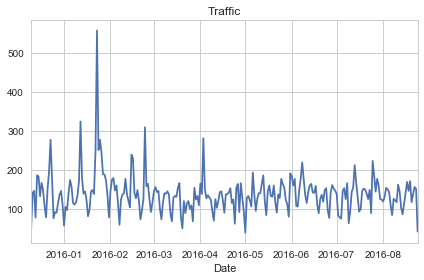

In [171]:
df[df.Reason == 'Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

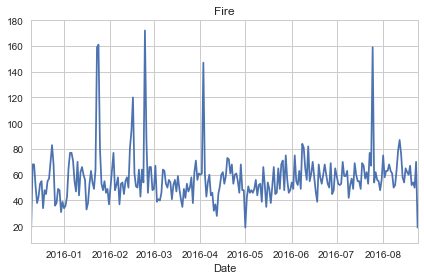

In [172]:
df[df.Reason == 'Fire'].groupby('Date')['twp'].count().plot()
plt.title('Fire')
plt.tight_layout()

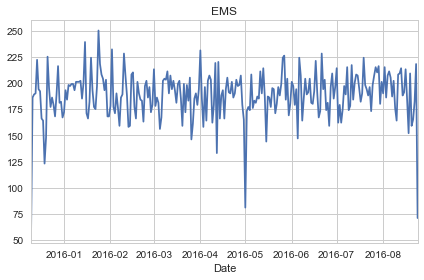

In [173]:
df[df['Reason'] == 'EMS'].groupby('Date')['twp'].count().plot()
plt.title('EMS')
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [184]:
dt = df.groupby(['Day of Week', 'Hour']).count()['Reason'].unstack()


** Now create a HeatMap using this new DataFrame. **

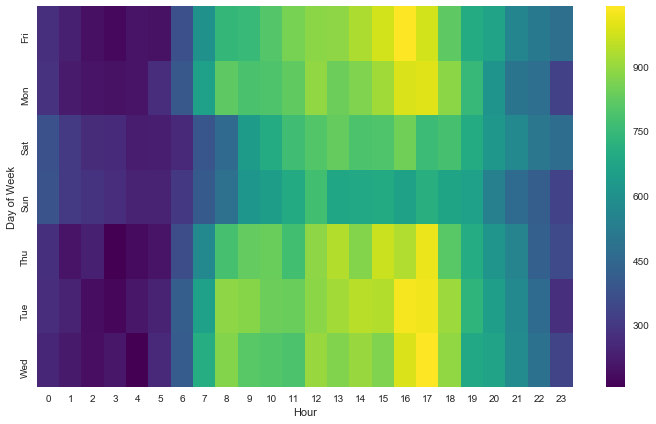

In [190]:
plt.figure(figsize = (12,7))
sns.heatmap(dt, cmap = 'viridis')

** Now create a clustermap using this DataFrame. **

/Users/admin/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


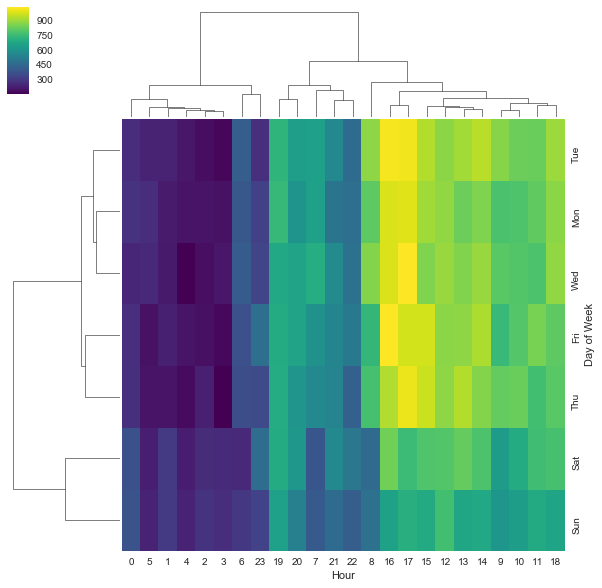

In [191]:
sns.clustermap(dt, cmap = 'viridis')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [196]:
dt2 = df.groupby(['Day of Week','Month'])['Reason'].count().unstack()

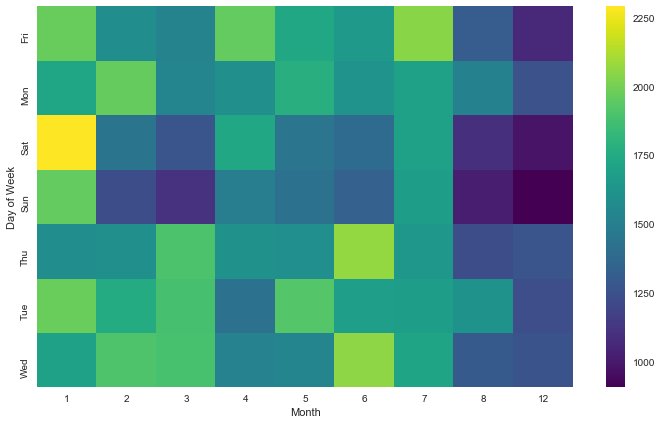

In [198]:
plt.figure(figsize = (12,7))
sns.heatmap(dt2, cmap = 'viridis')

/Users/admin/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


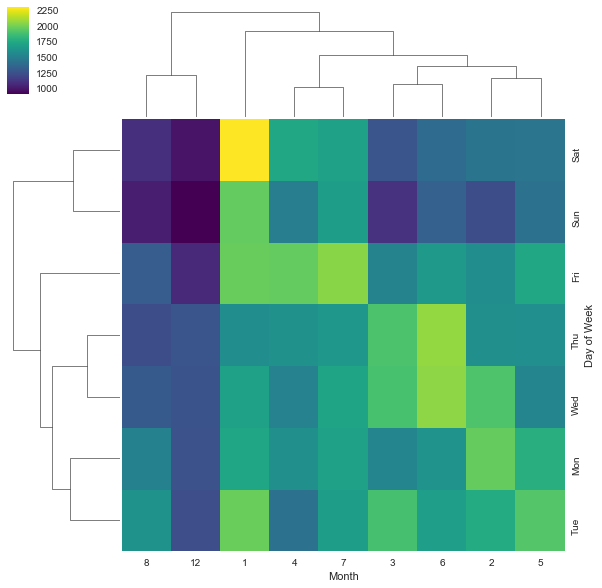

In [199]:
plt.figure(figsize=(12,6))
sns.clustermap(dt2, cmap = 'viridis')

**Continue exploring the Data however you see fit!**
# Great Job!